In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/heart.csv')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [2]:
df = df.dropna()
df=pd.get_dummies(df,columns=['Sex','AHD','ChestPain','Thal','AHD'])

In [3]:
y=df['AHD_Yes']
X=df.drop(columns=['AHD_No','AHD_Yes'])

In [4]:
X_norm=(X-X.mean())/X.std()
X_norm

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Sex_0,Sex_1,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,0.934603,0.749116,-0.275978,2.426332,1.008496,0.017465,-0.695246,1.067164,2.260330,-0.720760,-0.689930,0.689930,-0.955534,-0.621727,-0.443751,3.445712,3.930370,-1.108572,-0.793562
1,1.376605,1.593577,0.743301,-0.410757,1.008496,-1.813274,1.433497,0.381130,0.642696,2.474249,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,0.899025,-0.793562
2,1.376605,-0.658320,-0.352904,-0.410757,1.008496,-0.897904,1.433497,1.324427,0.642696,1.409246,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
3,-1.938409,-0.095345,0.050961,-0.410757,-1.001728,1.630258,-0.695246,2.096215,2.260330,-0.720760,-0.689930,0.689930,-0.955534,1.603007,-0.443751,-0.289239,-0.253572,0.899025,-0.793562
4,-1.496407,-0.095345,-0.833696,-0.410757,1.008496,0.976423,-0.695246,0.295376,-0.974938,-0.720760,1.444542,-1.444542,-0.955534,-0.621727,2.245926,-0.289239,-0.253572,0.899025,-0.793562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.271600,0.467629,-0.122124,-0.410757,-1.001728,-1.159438,1.433497,-0.733675,0.642696,-0.720760,1.444542,-1.444542,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
298,-1.054405,-1.221294,0.320204,-0.410757,-1.001728,-0.767137,-0.695246,0.123867,0.642696,-0.720760,-0.689930,0.689930,-0.955534,-0.621727,-0.443751,3.445712,-0.253572,-1.108572,1.255898
299,1.487106,0.692818,-1.045244,2.426332,-1.001728,-0.374836,-0.695246,2.010461,0.642696,1.409246,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
300,0.271600,-0.095345,-2.237607,-0.410757,-1.001728,-1.508150,1.433497,0.123867,0.642696,0.344243,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898


In [5]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
kfold=KFold(n_splits=5, shuffle=True)

train_accuracy=[]
test_accuracy=[]
for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_norm,y)
    result=cross_validate(X=X_norm,y=y,cv=kfold,
                          scoring=['accuracy','roc_auc'],
                          estimator=knn,
                          return_train_score=True)
    print(i, result['test_accuracy'].mean(), result['test_roc_auc'].mean())
    train_accuracy.append(result['train_accuracy'].mean())
    test_accuracy.append(result['test_accuracy'].mean())

2 0.7340112994350283 0.8265412090427903
3 0.7880225988700565 0.8468289927445525
4 0.7912429378531074 0.8698533914121823
5 0.7910734463276836 0.8662297494668293
6 0.7981355932203391 0.874640800695335
7 0.8245762711864406 0.884665635110574
8 0.8246892655367232 0.8849818223775399
9 0.8048022598870057 0.889903158669713
10 0.831638418079096 0.8896113239032027
11 0.8279661016949152 0.8995607076654452
12 0.8285310734463277 0.8936768214237972
13 0.8216949152542373 0.9014156854639614
14 0.8350847457627119 0.8945159606995814
15 0.8216384180790961 0.8911219455981627
16 0.8387005649717514 0.9042694448618906
17 0.8383050847457628 0.9082347665709264
18 0.8150282485875706 0.8896809450228282
19 0.8348022598870056 0.8984301575081185
20 0.8283615819209041 0.901980002278332
21 0.8280225988700565 0.8971925743477469
22 0.8383050847457628 0.901011537698502
23 0.8316949152542372 0.9109994222376037
24 0.8384745762711864 0.9055349886794548
25 0.8217514124293785 0.9031794189735305
26 0.8280225988700565 0.904482

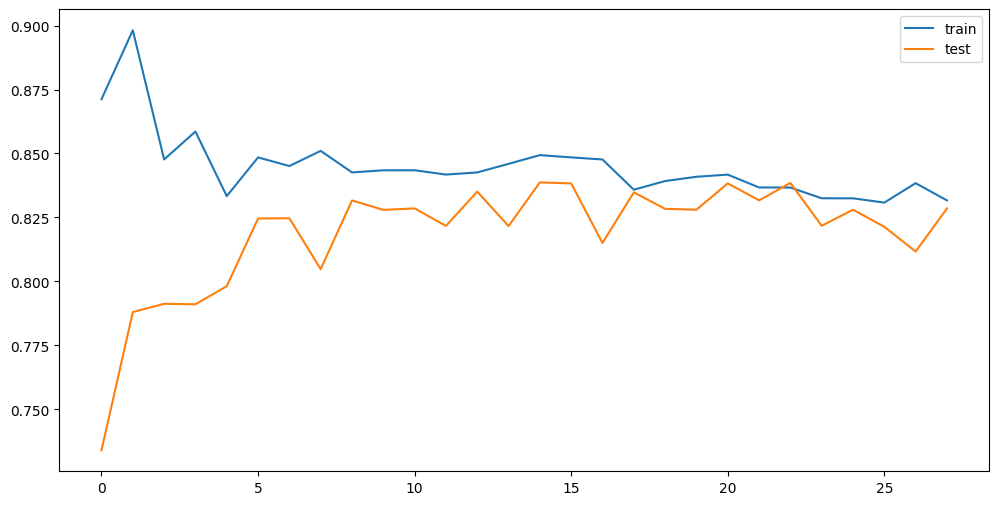

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.legend()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

# 파이프라인 재료
knn = KNeighborsClassifier()
scaler = StandardScaler()

# 파이프라인 만들기
pipe = Pipeline([('scaler',scaler),('knn',knn)])

# 하이퍼패러미터 범주지정
degree = range(1,20)
param_grid = {'knn__n_neighbors':degree}

# 교차검증 객체지정
kfold = KFold(n_splits=5, shuffle=True)

# GridSearchCV이용 하이퍼패러미터 튜닝 자동화
grid_search = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid,
    cv = kfold,
    scoring = 'accuracy',
    return_train_score=True    
)

# 학습
grid_search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True, scoring='accuracy')

In [8]:
import pandas as pd

df=pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001491,0.001826,0.014853,0.004407,1,{'knn__n_neighbors': 1},0.700000,0.750000,0.813559,0.677966,...,0.747627,0.052675,19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001784,0.001478,0.010511,0.002989,2,{'knn__n_neighbors': 2},0.700000,0.766667,0.847458,0.711864,...,0.767910,0.056861,18,0.911392,0.864979,0.869748,0.861345,0.857143,0.872921,0.019678
2,0.002643,0.003371,0.014054,0.003608,3,{'knn__n_neighbors': 3},0.700000,0.716667,0.864407,0.745763,...,0.774859,0.068009,17,0.907173,0.890295,0.869748,0.903361,0.882353,0.890586,0.013714
3,0.003393,0.002540,0.014315,0.002151,4,{'knn__n_neighbors': 4},0.750000,0.733333,0.864407,0.762712,...,0.788192,0.050432,16,0.869198,0.864979,0.831933,0.831933,0.831933,0.845995,0.017274
4,0.001636,0.002106,0.013228,0.003070,5,{'knn__n_neighbors': 5},0.766667,0.783333,0.864407,0.745763,...,0.791356,0.040291,15,0.860759,0.852321,0.823529,0.865546,0.844538,0.849339,0.014773
5,0.003439,0.003327,0.014232,0.002542,6,{'knn__n_neighbors': 6},0.800000,0.783333,0.847458,0.728814,...,0.794633,0.039083,14,0.843882,0.831224,0.819328,0.823529,0.806723,0.824937,0.012358
6,0.003969,0.002781,0.014070,0.003027,7,{'knn__n_neighbors': 7},0.783333,0.783333,0.830508,0.796610,...,0.811638,0.031524,13,0.839662,0.848101,0.840336,0.865546,0.831933,0.845116,0.011425
7,0.004334,0.002833,0.012229,0.002151,8,{'knn__n_neighbors': 8},0.816667,0.800000,0.813559,0.779661,...,0.814859,0.027999,12,0.835443,0.848101,0.840336,0.848739,0.823529,0.839230,0.009287
8,0.003518,0.002912,0.013595,0.003215,9,{'knn__n_neighbors': 9},0.783333,0.800000,0.847458,0.796610,...,0.814972,0.027103,11,0.848101,0.839662,0.831933,0.861345,0.831933,0.842595,0.011116
9,0.003297,0.004144,0.014320,0.001978,10,{'knn__n_neighbors': 10},0.800000,0.833333,0.864407,0.779661,...,0.828362,0.034057,6,0.843882,0.848101,0.819328,0.869748,0.827731,0.841758,0.017482


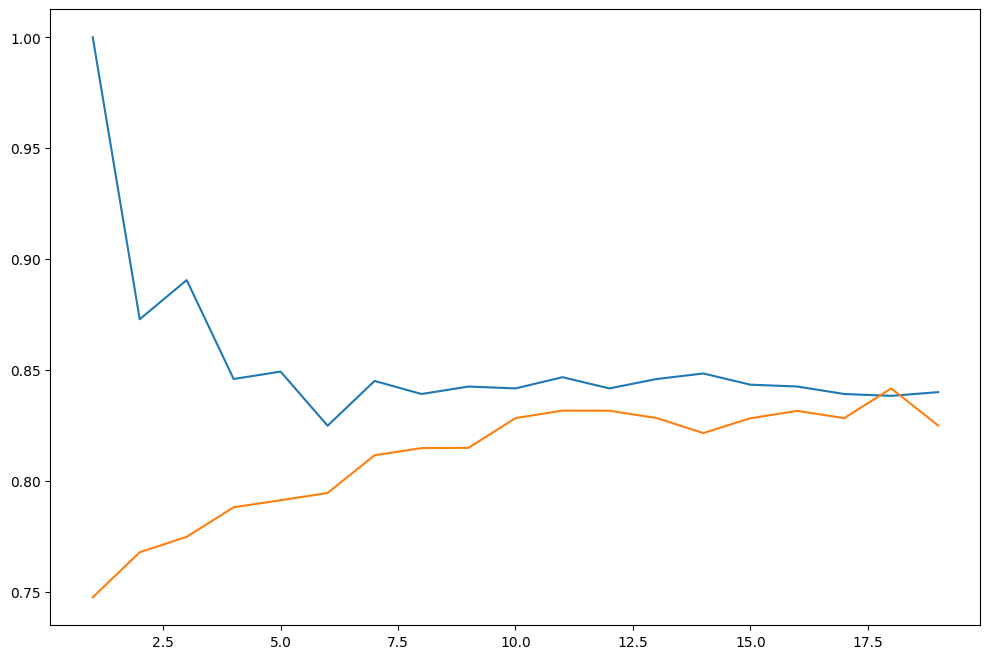

In [9]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(df['param_knn__n_neighbors'],df['mean_train_score'])
plt.plot(df['param_knn__n_neighbors'],df['mean_test_score'])

In [10]:

grid_search.best_params_, grid_search.best_score_

({'knn__n_neighbors': 18}, 0.8417514124293787)